In [1]:
import chainladder as cl

In [2]:
# Load Data
clrd = cl.load_sample('clrd')
medmal_paid = clrd.groupby('LOB').sum().loc['medmal', 'CumPaidLoss']
medmal_prem = clrd.groupby('LOB').sum().loc['medmal', 'EarnedPremDIR'].latest_diagonal
medmal_prem.rename('development', ['premium'])

,premium
1988,"440,469"
1989,"476,358"
1990,"460,119"
1991,"436,063"
1992,"426,077"
1993,"434,936"
1994,"470,861"
1995,"530,111"
1996,"548,637"
1997,"574,315"


In [3]:
# Generate LDFs and Tail Factor
medmal_paid = cl.Development().fit_transform(medmal_paid)
medmal_paid = cl.TailCurve().fit_transform(medmal_paid)

In [4]:
# Benktander Model
benk = cl.Benktander()

In [5]:
# Prep Benktander Grid Search with various assumptions, and a scoring function
param_grid = dict(n_iters=list(range(1,100,2)),
                  apriori=[0.50, 0.75, 1.00])
scoring = {'IBNR':lambda x: x.ibnr_.sum()}
grid = cl.GridSearch(benk, param_grid, scoring=scoring)
# Perform Grid Search
grid.fit(medmal_paid, sample_weight=medmal_prem)

GridSearch(error_score='raise',
           estimator=Benktander(apriori=1.0, apriori_sigma=0, n_iters=1,
                                random_state=None),
           param_grid={'apriori': [0.5, 0.75, 1.0],
                       'n_iters': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                   25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45,
                                   47, 49, 51, 53, 55, 57, 59, ...]},
           scoring={'IBNR': <function <lambda> at 0x7fbb66bae680>}, verbose=0)

[Text(0, 0.5, 'IBNR')]

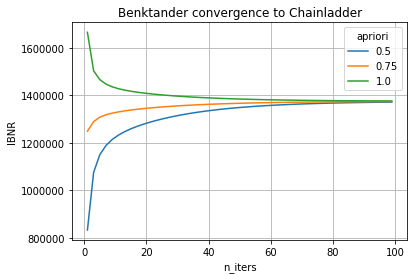

In [6]:
# Plot data
grid.results_.pivot(index='n_iters', columns='apriori', values='IBNR').plot(
    title='Benktander convergence to Chainladder', grid=True).set(ylabel='IBNR')